# Basic Data Access

Demonstrates opening a case and retrieving component data using indexing.

The primary way to open a case is to instantiate a `GridWorkBench` object. For these examples, a `case_path` variable is created in a hidden cell that reads from `case.txt`. The code below shows the syntax used for initialization.

```python
from esapp import GridWorkBench
from esapp.components import *

wb = GridWorkBench(case_path)
```

In [1]:
# This cell is hidden in the documentation.
# It performs the actual case loading for the example.
from esapp import GridWorkBench
from esapp.components import *
import numpy as np
import matplotlib.pyplot as plt
import ast

with open('../data/case.txt', 'r') as f:
    case_path = ast.literal_eval(f.read().strip())

wb = GridWorkBench(case_path)

'open' took: 3.6994 sec


In [2]:
# Plotting functions (hidden from documentation)
import sys; sys.path.insert(0, "..")
from plot_helpers import plot_gen_dispatch_and_voltage, plot_gen_load_balance

## Retrieve Component Data

The primary interface for accessing power system data is through the indexing syntax `wb[ComponentType, fields]`, which returns a pandas DataFrame. This provides a flexible way to extract and analyze component parameters.

In [3]:
bus_voltages = wb[Bus, "BusPUVolt"]
bus_voltages.head()

,BusNum,BusPUVolt
0,1,0.993545
1,2,0.991225
2,3,0.984548
3,4,0.978800
4,5,0.988985


Retrieve multiple fields at once and filter the results. Here we get all online generators with their power output:

In [4]:
gens = wb[Gen, ["GenMW", "GenMVR", "GenStatus"]]
online_gens = gens[gens["GenStatus"] == "Closed"]
online_gens.head()

,BusNum,GenID,GenMVR,GenMW,GenStatus
0,2,1,0.80000,2.500000,Closed
1,2,2,0.80000,2.500000,Closed
2,2,3,0.80000,2.500000,Closed
3,2,4,0.80000,2.500000,Closed
4,23,1,0.04408,69.274741,Closed


### Visualizing Generator Output

A bar chart provides a quick overview of the generation dispatch across the system.

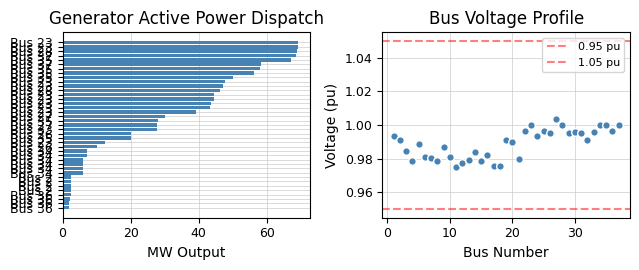

In [5]:
V = wb[Bus, ["BusPUVolt", "BusNum"]]
plot_gen_dispatch_and_voltage(online_gens, V)

Here is an example of retrieving and calculating the total system laod

In [6]:
loads = wb[Load, ["LoadMW", "LoadMVR"]]
total_load = loads['LoadMW'].sum()

Use the indexing syntax to update component parameters. Setting a field to a scalar value broadcasts it to all components of that type:

In [7]:
wb[Gen, "GenMW"] = 100.0

Read the modified values to confirm the update:

In [8]:
wb[Gen, "GenMW"].head(8)

,BusNum,GenID,GenMW
0,2,1,100.0
1,2,2,100.0
2,2,3,100.0
3,2,4,100.0
4,23,1,100.0
5,23,10,100.0
6,23,2,100.0
7,23,3,100.0
